## This notebook is testing the simulation of Spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),".."))
sys.path.append(os.path.join(os.getcwd(),"..","code"))
data_path = os.path.join(os.getcwd(),"..",'data')
sys.path.append(data_path)

In [3]:
import filters
import likelihood_functions as lk
import PoissonProcessClasses as PP
import auxiliary_functions as auxfun

In [4]:
# Reloading modules which are in development
import imp
imp.reload(filters)
imp.reload(auxfun)
imp.reload(lk)
imp.reload(PP)

<module 'PoissonProcessClasses' from '/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py'>

In [5]:
# reading stimulus
Stim = np.array(pd.read_csv(os.path.join(data_path,'Stim.csv'),header = None))
# reading location of spikes
tsp = np.hstack(np.array(pd.read_csv(os.path.join(data_path,'tsp.csv'),header = None)))

In [6]:
Stim = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))
tsp = np.array(pd.read_csv('/Users/val/Desktop/code_GLM_v1_Feb2010/myCode/Stim.csv',header = None))

In [7]:
dt = 0.01
tsp_int = np.ceil((tsp - dt*0.001)/dt)
tsp_int = np.reshape(tsp_int,(tsp_int.shape[0],1))
tsp_int = tsp_int.astype(int)
y = np.array([item in tsp_int for item in np.arange(Stim.shape[0]/dt)+1]).astype(int)

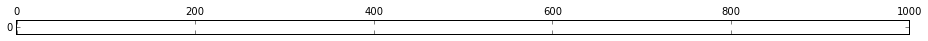

In [8]:
fig, ax = plt.subplots(figsize=(16, 2))
fig = ax.matshow(np.reshape(y[:1000],(1,len(y[:1000]))),cmap = 'Greys',aspect = 15)

In [9]:
# create a stimulus filter
kpeaks = np.array([0,round(20/3)])
pars_k = {'neye':5,'n':5,'kpeaks':kpeaks,'b':3}
K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20) 

In [10]:
# create a post-spike filter
hpeaks = np.array([0.1,2])
pars_h = {'n':5,'hpeaks':hpeaks,'b':.4,'absref':0.}
H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)

In [11]:
# Interpolate Post Spike Filter
MSP = auxfun.makeInterpMatrix(len(ht_domain),1)
MSP[0,0] = 0
H_orth = np.dot(MSP,H_orth)

In [12]:
M_k = lk.construct_M_k(Stim,K,dt)

103.626613902


In [13]:
M_h = lk.construct_M_h(tsp,H_orth,dt,Stim)

Combining $M_k$, $M_h$ and $\textbf{1}$ into one covariate matrix:

In [14]:
M = np.hstack((M_k,M_h,np.ones((M_h.shape[0],1))))
M = np.hstack((M_k,np.ones((M_k.shape[0],1))))

In [15]:
coeff_k0 = np.array([ 0.061453,0.284916,0.860335,1.256983,0.910615,0.488660,-0.887091,0.097441,0.026607,-0.090147])

coeff_h0 = np.zeros((5,))
coeff_h0 = np.array([-10, -5, 0, 2, -2])

pars0 = np.hstack((coeff_k0,3,coeff_h0))

# pars0 = np.hstack((coeff_k0,3))

In [16]:
print(np.sum(M_k))
print(sum(Stim))
print(sum(np.dot(K,coeff_k0)))

131048.535833
[56]
1.81073134886


First check for M_k only.

In [17]:
tsp_sim = auxfun.simSpikes(pars0,M,H,ht_domain,dt = 0.01)

99
250000
no spike
0.27225205978379724
spike99
sum of ih
-773.619049225
no spike
no spike
no spike
no spike
2.2806011871345846
spike1060
sum of ih
-773.619049225
0.6133075564697749
spike1086
sum of ih
-773.619049225
no spike
2.84184314249881
spike2430
sum of ih
-773.619049225
0.055616506353726634
spike2615
sum of ih
-773.619049225
0.647621922421086
spike3130
sum of ih
-773.619049225
0.29811685325588877
spike3904
sum of ih
-773.619049225
0.6247027571206565
spike3983
sum of ih
-773.619049225
0.915968937489006
spike4058
sum of ih
-773.619049225
0.7702101249036724
spike4224
sum of ih
-773.619049225
0.6394361457309442
spike4795
sum of ih
-773.619049225
1.5198949429562585
spike4887
sum of ih
-773.619049225
0.9272159286857785
spike5408
sum of ih
-773.619049225
0.551887414429171
spike5518
sum of ih
-773.619049225
0.2180249247598692
spike5620
sum of ih
-773.619049225
no spike
1.0706112660140115
spike6296
sum of ih
-773.619049225
0.8924555772833042
spike6497
sum of ih
-773.619049225
1.3941507364

In [18]:
len(tsp_sim)

677

In [19]:
tsp_sim

[1.51,
 10.85,
 16.199999999999999,
 26.140000000000001,
 31.289999999999999,
 39.030000000000001,
 39.82,
 40.57,
 42.230000000000004,
 47.939999999999998,
 48.859999999999999,
 54.07,
 55.170000000000002,
 56.189999999999998,
 57.240000000000002,
 64.960000000000008,
 66.0,
 70.650000000000006,
 76.840000000000003,
 77.670000000000002,
 81.900000000000006,
 82.700000000000003,
 83.370000000000005,
 89.409999999999997,
 94.859999999999999,
 96.210000000000008,
 96.990000000000009,
 98.049999999999997,
 99.010000000000005,
 100.27,
 111.72,
 112.56,
 118.82000000000001,
 119.43000000000001,
 120.13,
 120.86,
 136.56999999999999,
 148.64000000000001,
 149.39000000000001,
 150.42000000000002,
 154.89000000000001,
 157.37,
 158.68000000000001,
 160.70000000000002,
 165.20000000000002,
 177.61000000000001,
 178.56999999999999,
 184.96000000000001,
 185.94,
 187.36000000000001,
 190.81,
 196.67000000000002,
 204.81,
 205.75999999999999,
 209.58000000000001,
 210.53999999999999,
 214.6800000

In [20]:
print(H.shape)

(486, 5)
